In [188]:
import time

In [189]:
start = time.time()

c = []
cf = []
l = []
lf = []
c_dict = {}
l_dict = {}
itemlist = []
all_transactions = []
vertical_dataset = {}
min_support_threshold_percentage = 90
path = 'chess.dat.txt'

In [190]:
with open(path, 'r') as fptr:
    n = 0

    while True:
        line = fptr.readline()

        if not line:
            break

        n += 1
        token = line.split()
        token.sort()
        all_transactions.append(token)

        for j in token:
            item = (j,)

            if item not in c:
                c.append(item)
                cf.append(1)
            else:
                index = c.index(item)
                cf[index] += 1

    min_support_threshold_count = (min_support_threshold_percentage / 100) * n

    for i in range(len(c)):
        if cf[i] >= min_support_threshold_count:
            l.append(c[i])
            lf.append(cf[i])


In [191]:
def is_sublist(sublist, mainlist):
    return all(item in mainlist for item in sublist)


def get_support(itemset):
    support = 0

    for i in all_transactions:
        formatted_item = list(itemset)

        if is_sublist(formatted_item, i):
            support += 1

    return support

# get_support(('60', '34'))

In [192]:
def isjoinable(item_one, item_two):
    if len(item_one) == 1:
      return True
    if item_one[:-1] == item_two[:-1]:
        return True
    else:
        return False


In [193]:
def downward_closure_property(temp, L):
    for i in range(len(temp)):
        tpr = tuple([temp[j] for j in range(len(temp)) if j != i])
        if tpr not in L:
            return False
    return True

In [194]:

def frequent_patterns():
    cs = {
        'c1': c
    }
    ls = {
        'l1': l
    }
    c_support = {
        'c1': cf
    }
    l_support = {
        'l1': lf
    }

    l_step = 2

    while True:
        current_c_list = []
        current_l_list = []
        previous_l = l_step - 1

        for i in range(len(ls[f'l{previous_l}']) - 1):
            for j in range(i + 1, len(ls[f'l{previous_l}'])):
                if isjoinable(ls[f'l{previous_l}'][i], ls[f'l{previous_l}'][j]):
                    new_item = (*ls[f'l{previous_l}'][i], *ls[f'l{previous_l}'][j])
                    new_item = tuple(sorted(list(set(new_item))))

                    if downward_closure_property(new_item, ls[f'l{previous_l}']):
                        current_c_list.append(new_item)

        if not len(current_c_list):
            break

        cs[f'c{l_step}'] = current_c_list

        l_support_list = []
        c_support_list = []

        for i in current_c_list:
            support = get_support(i)
            c_support_list.append(support)

            if support >= min_support_threshold_count:
                current_l_list.append(i)
                l_support_list.append(support)

        c_support[f'c{l_step}'] = c_support_list
        ls[f'l{l_step}'] = current_l_list
        l_support[f'l{l_step}'] = l_support_list

        if not len(current_l_list):
            break

        l_step += 1
    return [ls, l_support]



In [195]:
results = frequent_patterns()
end = time.time()

total_time = end - start

print(total_time)

ls = results[0]
l_support = results[1]

4.811446189880371


In [196]:
print(ls.keys())

dict_keys(['l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7'])


In [197]:
ls

{'l1': [('29',),
  ('34',),
  ('36',),
  ('40',),
  ('48',),
  ('5',),
  ('52',),
  ('56',),
  ('58',),
  ('60',),
  ('62',),
  ('66',),
  ('7',)],
 'l2': [('29', '34'),
  ('29', '36'),
  ('29', '40'),
  ('29', '48'),
  ('29', '5'),
  ('29', '52'),
  ('29', '56'),
  ('29', '58'),
  ('29', '60'),
  ('29', '62'),
  ('29', '66'),
  ('29', '7'),
  ('34', '36'),
  ('34', '40'),
  ('34', '5'),
  ('34', '52'),
  ('34', '56'),
  ('34', '58'),
  ('34', '60'),
  ('34', '62'),
  ('34', '66'),
  ('34', '7'),
  ('36', '40'),
  ('36', '48'),
  ('36', '52'),
  ('36', '56'),
  ('36', '58'),
  ('36', '60'),
  ('36', '62'),
  ('36', '66'),
  ('36', '7'),
  ('40', '48'),
  ('40', '5'),
  ('40', '52'),
  ('40', '56'),
  ('40', '58'),
  ('40', '60'),
  ('40', '62'),
  ('40', '66'),
  ('40', '7'),
  ('48', '52'),
  ('48', '58'),
  ('48', '60'),
  ('48', '62'),
  ('48', '7'),
  ('5', '52'),
  ('5', '58'),
  ('5', '60'),
  ('52', '56'),
  ('52', '58'),
  ('52', '60'),
  ('52', '62'),
  ('52', '66'),
  ('52', 

In [198]:
l_support

{'l1': [3181,
  3040,
  3099,
  3170,
  3013,
  2971,
  3185,
  3021,
  3195,
  3149,
  3060,
  3021,
  3076],
 'l2': [3036,
  3084,
  3155,
  2998,
  2964,
  3170,
  3006,
  3180,
  3136,
  3045,
  3013,
  3069,
  2943,
  3017,
  2889,
  3031,
  2884,
  3039,
  2995,
  2913,
  2886,
  2930,
  3073,
  2987,
  3088,
  2924,
  3098,
  3052,
  2963,
  2924,
  2979,
  2987,
  2950,
  3159,
  2996,
  3169,
  3124,
  3045,
  2997,
  3050,
  3002,
  3012,
  2986,
  2877,
  2893,
  2960,
  2970,
  2924,
  3016,
  3184,
  3138,
  3049,
  3010,
  3065,
  3020,
  2974,
  2923,
  2919,
  3148,
  3060,
  3020,
  3075,
  3014,
  3021,
  3031,
  2892,
  2940,
  2906],
 'l3': [2939,
  3013,
  2885,
  3027,
  2880,
  3035,
  2991,
  2909,
  2882,
  2928,
  3058,
  2972,
  3073,
  2909,
  3083,
  3039,
  2948,
  2916,
  2972,
  2972,
  2943,
  3144,
  2981,
  3154,
  3111,
  3030,
  2989,
  3043,
  2987,
  2997,
  2973,
  2886,
  2953,
  2963,
  2919,
  3001,
  3169,
  3125,
  3034,
  3002,
  3058,
  30

In [199]:
# Time
# 1.2947986125946045
# 4.962864637374878
# 19.5726375579834
# 66.58569025993347
# 203.6155755519867
# 581.3295238018036

In [200]:
# L
# 5
# 7
# 8
# 10
# 11
# 13

In [201]:
import matplotlib.pyplot as plt

In [202]:
# minimum_support_thresholds = ['95', '90', '85', '80', '75', '70']

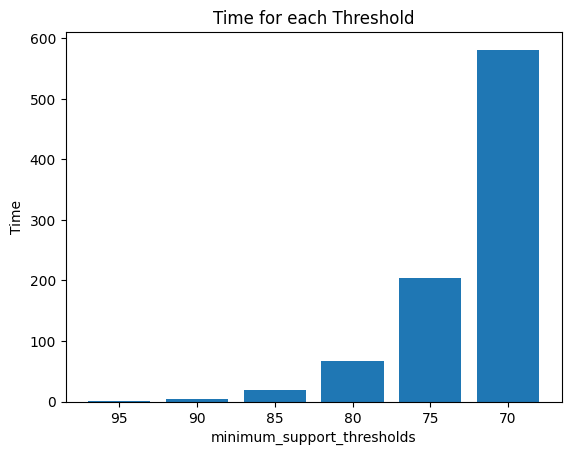

In [203]:
minimum_support_thresholds = ['95', '90', '85', '80', '75', '70']
times = [1.2947986125946045, 4.962864637374878, 19.5726375579834, 66.58569025993347, 203.6155755519867, 581.3295238018036]

plt.bar(minimum_support_thresholds, times)
plt.title('Time for each Threshold')
plt.xlabel('minimum_support_thresholds')
plt.ylabel('Time')
plt.show()

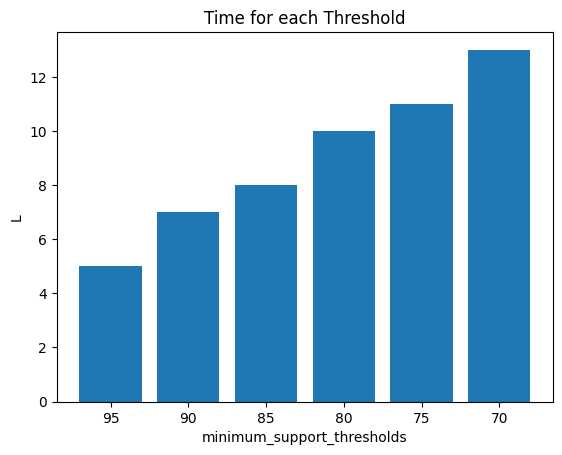

In [204]:
minimum_support_thresholds = ['95', '90', '85', '80', '75', '70']
ls = [5, 7, 8, 10, 11, 13]

plt.bar(minimum_support_thresholds, ls)
plt.title('Time for each Threshold')
plt.xlabel('minimum_support_thresholds')
plt.ylabel('L')
plt.show()